In [12]:
import pandas as pd
import sns as sns
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import implementations
import seaborn as sns

# Dataset Loading

In [13]:
dataset = pd.read_csv('../datasets/creditcard.csv')
dataset_y = dataset.Class
dataset_X = dataset.drop(columns=['Class'])


X_train, X_test, y_train, y_test = train_test_split(dataset_X, dataset_y, test_size=0.33, random_state=42)

# Exploratory Data Analysis

### 1. Missing values

In [14]:
if dataset.isnull().values.any():
    print('There are null values in the dataset!!!')
else:
    print('No null values in the dataset.')
missing_data = pd.DataFrame(dataset.isnull().sum(),columns=['Missing Values'])
print(missing_data)

No null values in the dataset.
        Missing Values
Time                 0
V1                   0
V2                   0
V3                   0
V4                   0
V5                   0
V6                   0
V7                   0
V8                   0
V9                   0
V10                  0
V11                  0
V12                  0
V13                  0
V14                  0
V15                  0
V16                  0
V17                  0
V18                  0
V19                  0
V20                  0
V21                  0
V22                  0
V23                  0
V24                  0
V25                  0
V26                  0
V27                  0
V28                  0
Amount               0
Class                0


### 2. Distribution of data

Text(0.5, 0.98, 'Plot distribution of data')

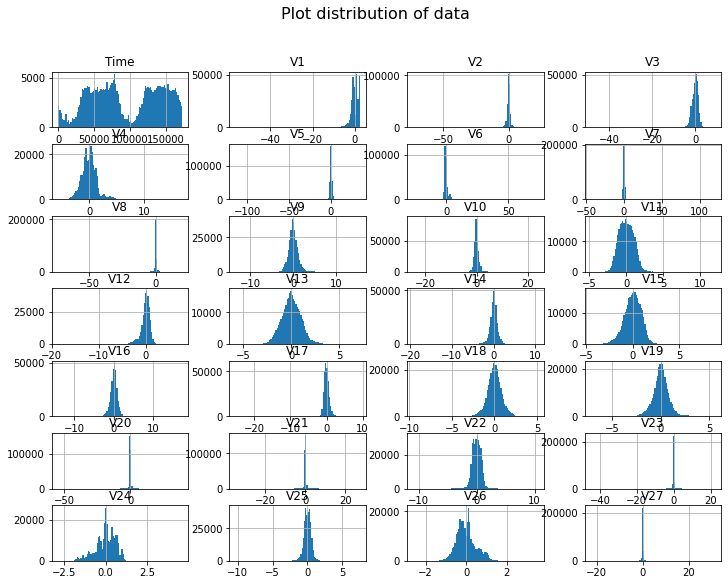

In [15]:
#check distribution of data
fig, axes = plt.subplots(len(dataset.columns)//4, 4, figsize=(12, 9))
i = 0
for triaxis in axes:
    for axis in triaxis:
        dataset.hist(column = dataset.columns[i], bins = 100, ax=axis)
        i = i+1
fig.suptitle('Plot distribution of data', fontsize=16)

### 3. Outliers detection

Text(0.5, 0.98, 'Boxplots for observing outliers')

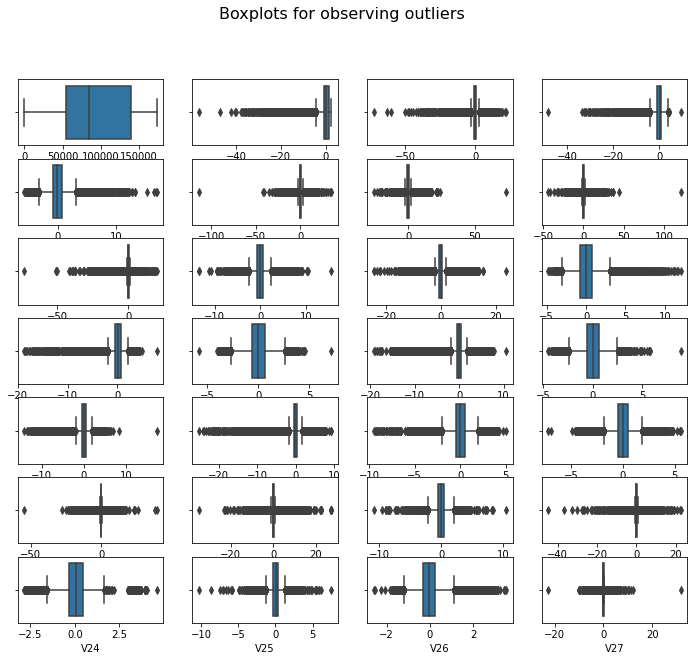

In [16]:
#plot boxplots for observing outliers
fig, axes = plt.subplots(len(dataset.columns)//4, 4, figsize=(12, 10))
i = 0
for triaxis in axes:
    for axis in triaxis:
        sns.boxplot(x=dataset[dataset.columns[i]], ax=axis)
        i = i+1
fig.suptitle('Boxplots for observing outliers', fontsize=16)

### 4. Removing outliers

In [17]:
print('Removing outliers...')
#remove outliers
alfa=0.2
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
dataset_mod = dataset[~((dataset < (Q1 - alfa * IQR)) |(dataset > (Q3 + alfa * IQR))).any(axis=1)]

Removing outliers...


### 5. Verify outliers removal

Text(0.5, 0.98, 'Plot boxplots for checking absence of outliers')

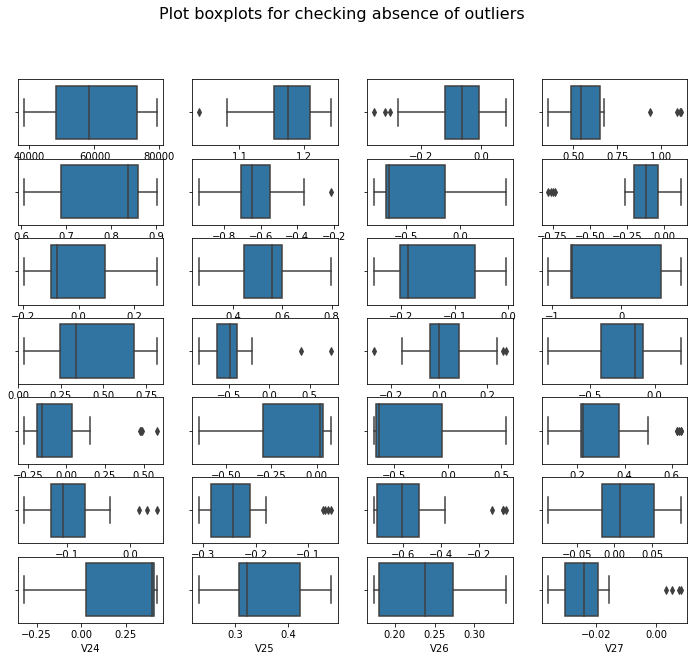

In [18]:
#plot boxplots for checking absence of outliers
fig, axes = plt.subplots(len(dataset_mod.columns)//4, 4, figsize=(12, 10))
i = 0
for triaxis in axes:
    for axis in triaxis:
        sns.boxplot(x=dataset_mod[dataset_mod.columns[i]], ax=axis)
        i = i+1
fig.suptitle('Plot boxplots for checking absence of outliers', fontsize=16)

### 6. Distribution of data after removing outliers

Text(0.5, 0.98, 'Distribution of data after removing outliers')

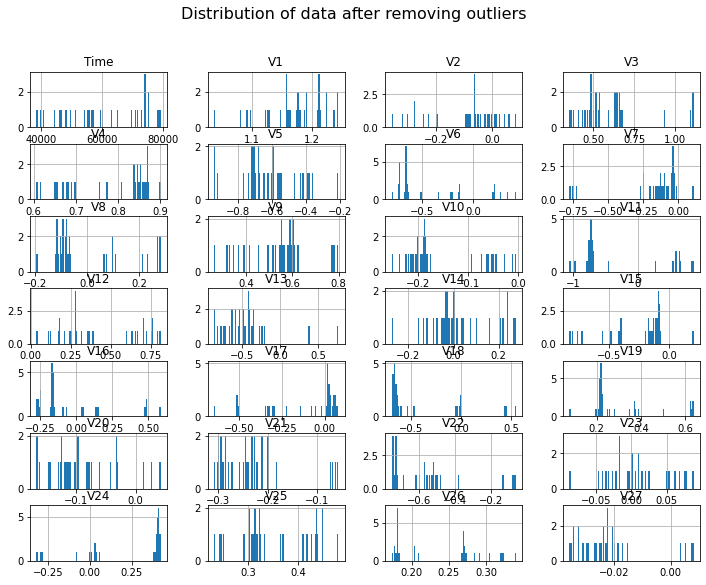

In [19]:
#check distribution of data
fig, axes = plt.subplots(len(dataset_mod.columns)//4, 4, figsize=(12, 9))
i = 0
for triaxis in axes:
    for axis in triaxis:
        dataset_mod.hist(column = dataset_mod.columns[i], bins = 100, ax=axis)
        i = i+1
fig.suptitle('Distribution of data after removing outliers', fontsize=16)

Since:
1. We observe that the distribution of the V-x features are drastically changed.
2. The values we removed in all features as outliers have the same order of magnitude of the other values
3. The values we removed in all features as outliers can be considered important values for characterising the respective distribution.

We suppose it is better to use the dataset as it is loaded without removing this "outliers".

### Class Division

In [20]:
dataset.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Only a small part of the dataset is composed by fraud, we then expect to have a model highly specific than sensitive. The negative values will be predicted more accurately than the positives.

# Linear Regression

In [21]:
accuracy, consumption = implementations.linear_regression(X_train, X_test, y_train, y_test)

print(accuracy)
print(consumption)

/usr/local/lib/python3.9/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


CPU not found. Standard TDP=250 assigned.
----------------LINEAR REGRESSION---------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.85      0.48      0.62       149

    accuracy                           1.00     93987
   macro avg       0.92      0.74      0.81     93987
weighted avg       1.00      1.00      1.00     93987

1.0
0.0012795114517211914


# Logistic Regression

In [22]:
accuracy, consumption = implementations.logistic_regression(X_train, X_test, y_train, y_test)

print(accuracy)
print(consumption)

/usr/local/lib/python3.9/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


CPU not found. Standard TDP=250 assigned.
----------------LOGISTIC REGRESSION---------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.84      0.60      0.70       149

    accuracy                           1.00     93987
   macro avg       0.92      0.80      0.85     93987
weighted avg       1.00      1.00      1.00     93987

1.0
0.041722564548254015


# Random Forest

In [23]:
accuracy, consumption = implementations.random_forest(X_train, X_test, y_train, y_test)

print(accuracy)
print(consumption)

/usr/local/lib/python3.9/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


CPU not found. Standard TDP=250 assigned.
----------------RANDOM FOREST---------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       0.94      0.79      0.86       149

    accuracy                           1.00     93987
   macro avg       0.97      0.90      0.93     93987
weighted avg       1.00      1.00      1.00     93987

1.0
1.3204918356239796


# STD Neural Network

In [24]:
accuracy, consumption = implementations.standard_neural_network(x_training_set=X_train, x_test_set=X_test, y_training_set=y_train, y_test_set=y_test,  hidden_layer_size=(30, 30))

print(accuracy)
print(consumption)

/usr/local/lib/python3.9/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


CPU not found. Standard TDP=250 assigned.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93838
           1       1.00      0.02      0.04       149

    accuracy                           1.00     93987
   macro avg       1.00      0.51      0.52     93987
weighted avg       1.00      1.00      1.00     93987

1.0
0.5331907097995281


# LeNet Neural Network

In [25]:
accuracy, consumption = implementations.lenet_neural_network(dataset_train=dataset, dataset_test=)

TypeError: lenet_neural_network() missing 1 required positional argument: 'dataset_test'